<a href="https://colab.research.google.com/github/vCillusion/Social-Defender/blob/master/Code/Social_Defender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Social Defender
Social Defender is an idea to use the machine algorithm to perform sentiment analysis and create a positive outlook for the users, by using customized views and tagging content. 

## Hinglish Sentiment Analysis
The first target of the application is to learn and perform sentiment analysis model to categorize Hinglish data. 

### Analyzing the Dataset
The dataset is loaded using the Pandas library.

Basic Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
Comments Text     126 non-null object
Feelings Text     126 non-null object
Emotions Text     126 non-null object
Context Text      126 non-null object
Feelings Value    126 non-null int64
Emotions Value    126 non-null int64
Context Value     126 non-null int64
dtypes: int64(3), object(4)
memory usage: 7.0+ KB
None
(126, 7)
Head and Tail of data
                                    Comments Text Feelings Text Emotions Text  \
0                                           🦋🦋🦋❤️      Positive        Loving   
1  Pdhane do didi ! 😫 Semester exam chl rhe hai !      Negative       Sarcasm   
2                               @dishapatani 🔥🔥🔥👈      Positive    Compliment   
3           @dishapatani u are always fabulous ❤️      Positive    Compliment   
4           @dishapatani mbd radisson blu delhi..       Neutral   Information   

  Context Text  Feelings Value  Emotions V

TypeError: ignored

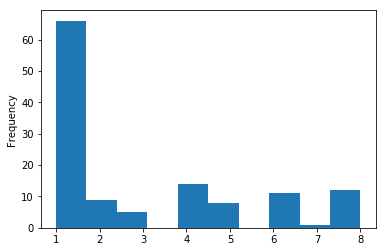

In [7]:
import pandas as pd
import io
df = pd.read_csv('https://raw.githubusercontent.com/vCillusion/Social-Defender/master/Data/Emotions/Emotions_Data.csv')
print('Basic Information')
print(df.info())
print(df.shape)
print('Head and Tail of data')
print(df.head())
print(df.tail())
# Plot to get a gist of frequency and type of values
df['Emotions Value'].plot(kind='hist')
short_data = df.head()

### Processing the data
We might want to clean the data to get better results. We could remove the stop words, most common words to understand the context better.

In [0]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words("english")
print(short_data["Comments Text"])
print('Remove Stop words')
print(stopwords.words("english"))

In [21]:
import os
def loadFileFromUrl ( url, filename, override = False ) :
  exists = os.path.isfile(filename)
  if not exists or override:
    # raw=true is important so you download the file rather than the webpage.
    !wget $url
    # rename the file
    !mv $filename\?raw\=true $filename
  return filename

def readFile ( filename ) :
  file = open(filename, 'r')
  return file.read()

def readFileFromUrl ( url, filename ) :
  return readFile(loadFileFromUrl(url, filename))

def readFileFromUrlSplit ( url, filename ) :
  return readFileFromUrl(url, filename).splitlines()

# Load Hindi Stopwords
fileUrl = 'https://github.com/vCillusion/Social-Defender/blob/master/Data/Stop%20Words/stop_hindi.txt?raw=true'
fileName = 'stop_hindi.txt'
stop_hindi = readFileFromUrlSplit (fileUrl, fileName)
print(stop_hindi)

# Load Hinglish Stopwords
fileUrl = 'https://github.com/vCillusion/Social-Defender/blob/master/Data/Stop%20Words/stop_hinglish.txt?raw=true'
fileName = 'stop_hinglish.txt'
stop_hinglish = readFileFromUrlSplit (fileUrl, fileName)
print(stop_hinglish)

['पर', 'इन', 'वह', 'यिह', 'वुह', 'जिन्हें', 'जिन्हों', 'किन्हों', 'किन्हें', 'इत्यादि', 'द्वारा', 'इन्हें', 'इन्हों', 'उन्हों', 'बिलकुल', 'इन्हीं', 'उन्हीं', 'उन्हें', 'इसमें', 'जितना', 'दुसरा', 'कितना', 'कितने', 'कितनो', 'वग़ैरह', 'दूसरे', 'कौनसा', 'लेकिन', 'होता', 'करने', 'किया', 'लिये', 'अपने', 'नहीं', 'दिया', 'इसका', 'करना', 'वाले', 'सकते', 'इसके', 'सबसे', 'होने', 'करते', 'बहुत', 'करें', 'होती', 'अपनी', 'उनके', 'कहते', 'होते', 'करता', 'उनकी', 'इसकी', 'सकता', 'रखें', 'अपना', 'उसके', 'जिसे', 'किसे', 'किसी', 'काफ़ी', 'पहले', 'नीचे', 'यहाँ', 'जैसा', 'जैसे', 'मानो', 'अंदर', 'भीतर', 'पूरा', 'सारा', 'होना', 'उनको', 'वहाँ', 'वहीं', 'जहाँ', 'जीधर', 'उनका', 'इनका', '\ufeffके', 'हैं', 'गया', 'बनी', 'एवं', 'हुआ', 'साथ', 'बाद', 'लिए', 'कुछ', 'कहा', 'यदि', 'हुई', 'इसे', 'हुए', 'अभी', 'सभी', 'कुल', 'रहा', 'रहे', 'इसी', 'उसे', 'जिस', 'जिन', 'कौन', 'किस', 'कोई', 'ऐसे', 'तरह', 'संग', 'यही', 'उसी', 'फिर', 'मगर', 'का', 'एक', 'यह', 'से', 'को', 'इस', 'कि', 'जो', 'कर', 'मे', 'ने', 'तो', 'ही', 'या', 'हो', '